In [12]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import csv
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau


Machine d'Amrta

In [175]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine de Dylane

In [13]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [14]:
# Chargement des données csv

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
data.head()


,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


## Avec les win/lose cons

In [15]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [201]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x_prediction

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1424,2679,3086,0,0,1,0,1.214286,1.714286,0.500000,0.750000,1.392857,1.750000,0.535714,0.928571
1085,8949,5396,0,1,1,0,1.343750,1.593750,0.625000,0.687500,1.625000,1.250000,0.718750,0.343750
1423,3818,2866,1,2,0,0,1.428571,1.678571,0.535714,0.642857,1.607143,1.571429,0.892857,0.535714
1983,5314,1346,3,1,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1982,1589,1729,0,0,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,6562,5314,1,0,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,3593,1589,0,0,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,3175,3593,0,2,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,1067,1159,0,1,2,0,0.806452,0.774194,0.419355,0.483871,1.354839,1.903226,0.612903,0.741935


### Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [16]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','homeTeam','awayTeam','id_match','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,homeTeam,awayTeam,id_match,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,AS Roma,Udinese Calcio,279509,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,CD Santa Clara,CS Marítimo,274443,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,Club Atlético de Madrid,RCD Mallorca,273894,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,SS Lazio,AC Milan,279520,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,US Sassuolo Calcio,US Lecce,279526,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,274477,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,274478,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,274479,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,274480,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [17]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
print(x_train.shape,y_train.shape)


(9251, 6) (9251,)


In [18]:
classes=np.unique(y_train)
nbClasses=len(classes)
epochs=200

nbClasses


3

In [19]:
x_train.shape[1]

6

In [20]:
def create_model():
    
    model = Sequential()
    
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.05))
    
    model.add(Dense(3, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [21]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

## Modèle  avec le dataset de 6 variables

In [22]:
save = ModelCheckpoint('model_Final_winner_V3Bis.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result2 = model.fit(x_train, y_train,epochs=40,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 9251 samples, validate on 2313 samples
Epoch 1/40

Epoch 00001: val_accuracy improved from -inf to 0.52832, saving model to model_Final_winner_V3Bis.h5
9251/9251 - 4s - loss: 1.0418 - accuracy: 0.4931 - val_loss: 0.9923 - val_accuracy: 0.5283
Epoch 2/40

Epoch 00002: val_accuracy did not improve from 0.52832
9251/9251 - 2s - loss: 1.0165 - accuracy: 0.5063 - val_loss: 1.0017 - val_accuracy: 0.5162
Epoch 3/40

Epoch 00003: val_accuracy improved from 0.52832 to 0.54561, saving model to model_Final_winner_V3Bis.h5
9251/9251 - 2s - loss: 1.0090 - accuracy: 0.5078 - val_loss: 1.0024 - val_accuracy: 0.5456
Epoch 4/40

Epoch 00004: val_accuracy did not improve from 0.54561
9251/9251 - 2s - loss: 1.0147 - accuracy: 0.5125 - val_loss: 0.9799 - val_accuracy: 0.5413
Epoch 5/40

Epoch 00005: val_accuracy did not improve from 0.54561
9251/9251 - 2s - loss: 1.0066 - accuracy: 0.5122 - val_loss: 1.1161 - val_accuracy: 0.4760
Epoch 6/40

Epoch 00006: val_accuracy did not improve from 0.54561


### Graphique 

Text(0, 0.5, 'Accuracy')

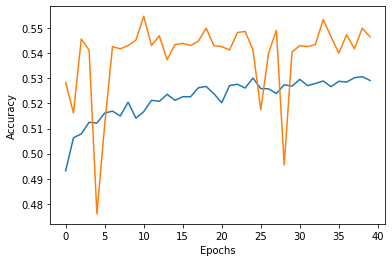

In [23]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Modèle  avec le dataset complet

In [210]:
# save = ModelCheckpoint('model_Final_winner2.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
# result = model.fit(x_train, y_train,epochs=100,verbose=2,validation_data=(x_test, y_test),
#                       callbacks=[save])

In [211]:
# plt.plot(result.history['accuracy'],label='Accuracy')#bleu
# plt.plot(result.history['val_accuracy'],label='validation_Accuracy')#orange
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

## Prédictions

In [24]:
unique = x_prediction.values
results = []
equal = []
victory = []
loss = []
i = 0

In [25]:
unique[1]

array(['2020-07-03', 'FINISHED', 'CD Santa Clara', 'CS Marítimo', 274443,
       5530, 5575, 3175, 1672, 1.0, 1.0, 1.206896551724138,
       1.3103448275862069], dtype=object)

In [26]:
model.load_weights("model_Final_winner_V3Bis.h5")

In [27]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    egalite = round(predictions_final[0][0]*100,2)
    victoire = round(predictions_final[0][1]*100,2)
    perte = round(predictions_final[0][2]*100,2)
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

In [28]:
df4 = {'date':x_prediction.date,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,
       'id_AwayTeam':x_prediction.idAwayTeam,'id_match':x_prediction.id_match,
       'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df4 = pd.DataFrame(df4)
df4

,date,status,id_HomeTeam,id_AwayTeam,id_match,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1429,2020-07-02,FINISHED,100,115,279509,AS Roma,Udinese Calcio,25.75,63.75,10.50,1
1984,2020-07-03,FINISHED,5530,5575,274443,CD Santa Clara,CS Marítimo,31.30,45.91,22.79,1
1090,2020-07-03,FINISHED,78,89,273894,Club Atlético de Madrid,RCD Mallorca,19.52,73.69,6.79,1
1432,2020-07-04,FINISHED,110,98,279520,SS Lazio,AC Milan,29.21,52.35,18.44,1
1431,2020-07-04,FINISHED,471,5890,279526,US Sassuolo Calcio,US Lecce,31.60,44.42,23.98,1
...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,1903,498,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,32.87,40.73,26.39,1
2025,2020-07-26,SCHEDULED,5620,5568,274478,Vitória FC,Os Belenenses Futebol,30.40,49.89,19.72,1
2026,2020-07-26,SCHEDULED,5530,5543,274479,CD Santa Clara,Vitória SC,33.50,36.14,30.36,1
2027,2020-07-26,SCHEDULED,5601,5544,274480,Portimonense SC,CD Aves,30.86,38.96,30.18,1


In [29]:
finished = []
scheduled = []

for i in df4.values:
    if i[1] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [30]:
column_names = ["date", "status", "idHomeTeam","idAwayTeam","id_match","homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [31]:
df_fini=df_fini.sort_values(by = 'date',ascending=False)
df_programme=df_programme.sort_values(by = 'date',ascending=False)

In [34]:
df_fini.to_csv('predict_win_lose/predictions_gain_perte_finished.csv',index=False)
df_fini.to_json ('predict_win_lose/predictions_gain_perte_finished.json')

df_programme.to_csv('predict_win_lose/predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json ('predict_win_lose/predictions_gain_perte_scheduled.json')